In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns
sns.set_style("white")

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.regularizers import l1,l2,l1_l2

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
from keras.models import model_from_json

In [4]:
df = pd.read_csv('df_processed_3_Test.csv')
df

,5160399000.0,5160532000.0,5160665000.0,5160798000.0,5160931000.0,5161064000.0,5161197000.0,5161330000.0,5161463000.0,5161596000.0,...,5178354000.0,5178487000.0,5178620000.0,5178753000.0,5178886000.0,5179019000.0,5179152000.0,5179285000.0,5179418000.0,target
0,2.914357,6.005487,11.112679,7.764572,10.354005,8.717390,11.811617,10.967102,8.950447,10.052719,...,10.745898,4.313584,7.970730,10.971555,8.633639,10.180341,6.006283,7.642098,7.705844,0
1,3.761473,14.935231,16.227498,12.060745,16.125729,17.732527,13.959423,12.714860,13.893367,14.138119,...,13.872319,12.760485,12.790868,12.352849,12.534128,12.468156,14.160435,13.076671,7.591130,0
2,11.028217,7.848927,9.656009,8.383288,11.324592,17.601830,19.012004,17.310340,13.895299,11.305647,...,27.018198,27.772122,22.960824,13.482299,5.201821,3.631783,12.813917,17.920611,13.337409,0
3,5.023361,-0.372701,1.719409,-0.158471,-0.600181,0.961100,3.194176,1.285016,3.058122,5.045652,...,1.885107,3.122816,4.586187,0.488737,0.719062,-0.952412,0.980869,0.961448,-1.371234,0
4,-1.578160,14.208589,17.693789,17.783248,14.259180,15.064771,14.936807,12.608595,10.680211,14.231489,...,12.773221,12.403332,14.344437,16.841927,16.502607,13.367102,10.853990,14.107845,11.783126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,32.358960,40.647417,39.412518,39.342760,41.315755,40.715680,43.086733,43.751558,41.296649,35.822778,...,38.024862,37.526201,41.985361,43.111458,40.785819,40.047145,42.223945,40.051310,36.898072,17
1688,33.578679,36.577034,41.970282,43.009397,38.711283,38.097511,42.928920,42.469824,43.022902,41.727019,...,39.053493,36.223812,43.160209,45.197478,42.456888,45.012606,42.016903,43.436745,43.085810,17
1689,36.387863,40.704578,45.547653,41.529156,39.982318,43.948524,43.428312,41.839868,40.422883,40.722008,...,39.479800,38.435553,40.920215,42.578626,42.640025,40.485374,37.557278,42.243883,38.311483,17
1690,33.754645,37.989886,44.204047,42.246398,40.540868,42.653116,44.121682,41.359135,38.402004,38.351411,...,40.550616,38.882939,40.271028,41.177553,38.528560,41.839293,36.851613,36.211286,37.334487,17


In [5]:
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691
5160399000.0,2.914357,3.761473,11.028217,5.023361,-1.578160,10.730852,-2.266973,5.056445,8.874357,14.170042,...,37.201162,37.898221,37.403532,39.270168,37.763319,32.358960,33.578679,36.387863,33.754645,38.289796
5160532000.0,6.005487,14.935231,7.848927,-0.372701,14.208589,10.303402,6.500441,9.149654,1.357946,16.585755,...,40.765222,36.766684,38.861594,42.297977,42.986529,40.647417,36.577034,40.704578,37.989886,38.432963
5160665000.0,11.112679,16.227498,9.656009,1.719409,17.693789,14.076690,9.329949,12.000304,2.632181,21.061900,...,44.195838,40.862483,42.263165,44.650282,45.358623,39.412518,41.970282,45.547653,44.204047,42.930091
5160798000.0,7.764572,12.060745,8.383288,-0.158471,17.783248,14.812628,8.979470,6.226616,0.530728,17.924436,...,40.519546,40.822754,39.306398,41.789605,41.275350,39.342760,43.009397,41.529156,42.246398,38.503815
5160931000.0,10.354005,16.125729,11.324592,-0.600181,14.259180,14.892475,9.513154,9.926775,0.743850,18.454823,...,40.869606,42.080346,41.623347,42.206673,42.310629,41.315755,38.711283,39.982318,40.540868,42.502572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179019000.0,10.180341,12.468156,3.631783,-0.952412,13.367102,16.893251,8.862821,12.565569,2.880302,17.345304,...,40.803439,40.583451,40.988317,41.738260,42.734140,40.047145,45.012606,40.485374,41.839293,42.873818
5179152000.0,6.006283,14.160435,12.813917,0.980869,10.853990,15.434263,8.331217,8.797950,0.716322,13.984768,...,38.368183,38.115521,38.137407,39.088355,39.366534,42.223945,42.016903,37.557278,36.851613,41.592733
5179285000.0,7.642098,13.076671,17.920611,0.961448,14.107845,15.846285,11.437863,13.239949,0.230257,13.833375,...,40.230528,39.356291,40.831732,41.145439,41.427592,40.051310,43.436745,42.243883,36.211286,43.183435
5179418000.0,7.705844,7.591130,13.337409,-1.371234,11.783126,13.994480,9.454811,6.726787,-0.191584,13.680927,...,37.458661,39.164321,38.616038,39.851155,40.610516,36.898072,43.085810,38.311483,37.334487,42.012014


In [6]:
sequences = list()
for i in range(df.shape[1]):
    values = df.iloc[:-1,i].values
    sequences.append(values)
targets = df.iloc[-1, :].values

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(targets)
encoded_y = encoder.transform(targets)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
targets = dummy_y

In [9]:
X_test, y_test = sequences, targets

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.externals.joblib import dump, load
# sc = StandardScaler()
sc = load('std_scaler.bin')
X_test = sc.transform(X_test)

/home/wuh007/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
X_test.shape

(1692, 144)

In [12]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
X_test.shape

(1692, 144, 1)

In [14]:
class Model:
    def __init__(self, path_model, path_weight):
        self.model = self.loadmodel(path_model, path_weight)
        self.graph = tf.get_default_graph()    
    
    @staticmethod
    def loadmodel(path_model, path_weight):
        json_file = open(path_model, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(path_weight)
        return model

    def predict(self, X):
        with self.graph.as_default():
            return self.model.predict(X)

In [15]:
# work_dir_model = '/home/hongyu/Documents/Spring2020/ECE_research/3_section/models_mixed/'
# work_dir_weight = '/home/hongyu/Documents/Spring2020/ECE_research/3_section/weights_mixed/'

work_dir_model = '/home/wuh007/Desktop/signal/signal_analysis/data_18points/3_section/models_mixed/'
work_dir_weight = '/home/wuh007/Desktop/signal/signal_analysis/data_18points/3_section/weights_mixed/'

In [16]:
# np.argwhere(y_pred.argmax(axis=1) == 0)

In [17]:
# y_pred[y_pred.argmax(axis=1) == 0]

In [18]:
model_3sec = Model(work_dir_model + 'LSTM3sec_model.json', work_dir_weight + 'LSTM3sec_weight.h5')
model_TopToTwo = Model(work_dir_model + 'LSTM_TopToTwo_model.json', work_dir_weight + 'LSTM_TopToTwo_weight.h5')
model_MiddleToTwo = Model(work_dir_model + 'LSTM_MiddleToTwo_model.json', work_dir_weight + 'LSTM_MiddleToTwo_weight.h5')
model_ButtomToTwo = Model(work_dir_model + 'LSTM_ButtomToTwo_model.json', work_dir_weight + 'LSTM_ButtomToTwo_weight.h5')

model_TopTopToThree = Model(work_dir_model + 'LSTM_TopTopToThree_model.json', work_dir_weight + 'LSTM_TopTopToThree_weight.h5')
model_TopButtomToThree = Model(work_dir_model + 'LSTM_TopButtomToThree_model.json', work_dir_weight + 'LSTM_TopButtomToThree_weight.h5')

model_MiddleTopToThree = Model(work_dir_model + 'LSTM_MiddleTopToThree_model.json', work_dir_weight + 'LSTM_MiddleTopToThree_weight.h5')
model_MiddleButtomToThree = Model(work_dir_model + 'LSTM_MiddleButtomToThree_model.json', work_dir_weight + 'LSTM_MiddleButtomToThree_weight.h5')

model_ButtomTopToThree = Model(work_dir_model + 'LSTM_ButtomTopToThree_model.json', work_dir_weight + 'LSTM_ButtomTopToThree_weight.h5')
model_ButtomButtomToThree = Model(work_dir_model + 'LSTM_ButtomButtomToThree_model.json', work_dir_weight + 'LSTM_ButtomButtomToThree_weight.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
X_test[0]

array([[-0.99063015],
       [-0.89059682],
       [-0.70649538],
       [-0.87725951],
       [-0.76233795],
       [-0.89350874],
       [-0.76272074],
       [-0.78733247],
       [-0.83600327],
       [-0.7779857 ],
       [-0.74402156],
       [-1.02369236],
       [-1.14812201],
       [-1.16277141],
       [-1.15074772],
       [-0.92205267],
       [-0.91593185],
       [-0.8610631 ],
       [-0.95833558],
       [-1.11209724],
       [-0.83975244],
       [-1.01136548],
       [-1.03390043],
       [-0.93042182],
       [-0.95902365],
       [-1.02660282],
       [-0.84842312],
       [-0.97348321],
       [-0.90468305],
       [-1.00794762],
       [-1.0666574 ],
       [-1.04514777],
       [-0.84641719],
       [-0.86705859],
       [-1.06837128],
       [-1.15196067],
       [-1.05990771],
       [-0.91861774],
       [-0.92560881],
       [-0.99787076],
       [-0.91557598],
       [-1.0369491 ],
       [-1.05320889],
       [-0.82866508],
       [-0.78794566],
       [-0

In [70]:
y_pred_3sec

array([[5.0843680e-01, 4.8435178e-01, 7.2113457e-03],
       [8.1167686e-01, 1.1194020e-01, 7.6382972e-02],
       [1.0188451e-02, 7.9662569e-02, 9.1014892e-01],
       ...,
       [2.9628596e-15, 1.4826810e-08, 1.0000000e+00],
       [2.9897646e-17, 4.3845588e-10, 1.0000000e+00],
       [7.2739205e-14, 4.7277226e-08, 1.0000000e+00]], dtype=float32)

In [75]:
y_pred_3sec[y_pred_3sec.max(axis=1) > 0.90].argmax(axis=1) == 0

array([False,  True,  True, ..., False, False, False])

In [69]:
y_pred_3sec = model_3sec.predict(X_test)
y_pred_TopToTwo = model_TopToTwo.predict(X_test[y_pred_3sec[y_pred_3sec.max(axis=1) > 0.90].argmax(axis=1) == 0])
y_pred_MiddleToTwo = model_MiddleToTwo.predict(X_test[y_pred_3sec.argmax(axis=1) == 1])
y_pred_ButtomToTwo = model_ButtomToTwo.predict(X_test[y_pred_3sec.argmax(axis=1) == 2])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1692 but corresponding boolean dimension is 1015

In [56]:
y_pred_TopTopToThree = model_TopTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 0])
y_pred_TopButtomToThree = model_TopButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 1])

y_pred_MiddleTopToThree = model_MiddleTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 0])
y_pred_MiddleButtomToThree = model_MiddleButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 1])

y_pred_ButtomTopToThree = model_ButtomTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 0])
y_pred_ButtomButtomToThree = model_ButtomButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 1])

In [ ]:
y_pred_TopTopToThree = model_TopTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 0])
y_pred_TopButtomToThree = model_TopButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 1])

y_pred_MiddleTopToThree = model_MiddleTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 0])
y_pred_MiddleButtomToThree = model_MiddleButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 1])

y_pred_ButtomTopToThree = model_ButtomTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 0])
y_pred_ButtomButtomToThree = model_ButtomButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 1])

In [57]:
y_pred_3sec = model_3sec.predict(X_test)
y_pred_TopToTwo = model_TopToTwo.predict(X_test[y_pred_3sec.argmax(axis=1) == 0])
y_pred_MiddleToTwo = model_MiddleToTwo.predict(X_test[y_pred_3sec.argmax(axis=1) == 1])
y_pred_ButtomToTwo = model_ButtomToTwo.predict(X_test[y_pred_3sec.argmax(axis=1) == 2])

y_pred_TopTopToThree = model_TopTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 0])
y_pred_TopButtomToThree = model_TopButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 1])
y_pred_MiddleTopToThree = model_MiddleTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 0])
y_pred_MiddleButtomToThree = model_MiddleButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 1])
y_pred_ButtomTopToThree = model_ButtomTopToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 0])
y_pred_ButtomButtomToThree = model_ButtomButtomToThree.predict(X_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 1])

In [58]:
y_pred_3s = y_pred_3sec.argmax(axis=1)
y_pred_3s, len(y_pred_3s)

(array([0, 0, 2, ..., 2, 2, 2]), 1692)

In [59]:
y_test_3s = y_test.argmax(axis=1)
y_test_3s[y_test_3s <= 5] = 0
y_test_3s[(y_test_3s <= 11) & (y_test_3s > 5)] = 1
y_test_3s[y_test_3s > 11] = 2
y_test_3s, len(y_test_3s)

(array([0, 0, 0, ..., 2, 2, 2]), 1692)

In [60]:
y_pred_3sec.max(axis=1), len(y_pred_3sec)

(array([0.5084368 , 0.81167686, 0.9101489 , ..., 1.        , 1.        ,
        1.        ], dtype=float32), 1692)

In [61]:
import copy
y_pred_3sec_secondmax = copy.deepcopy(y_pred_3sec)
y_pred_3sec_secondmax = y_pred_3sec_secondmax.tolist()

In [62]:
for i in range(len(y_pred_3sec_secondmax)):
    y_pred_3sec_secondmax[i].remove(max(y_pred_3sec_secondmax[i])) 
y_pred_3sec_secondmax = np.asarray(y_pred_3sec_secondmax)

In [63]:
y_pred_3sec_secondmax.max(axis=1), len(y_pred_3sec_secondmax)

(array([4.84351784e-01, 1.11940198e-01, 7.96625689e-02, ...,
        1.48268100e-08, 4.38455883e-10, 4.72772257e-08]), 1692)

In [64]:
y_pred_3sec.min(axis=1), len(y_pred_3sec)

(array([7.2113457e-03, 7.6382972e-02, 1.0188451e-02, ..., 2.9628596e-15,
        2.9897646e-17, 7.2739205e-14], dtype=float32), 1692)

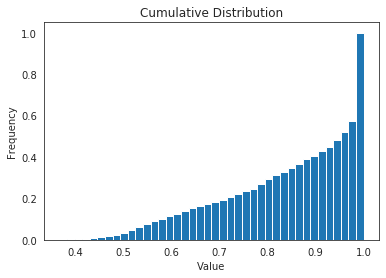

In [65]:
plt.hist(y_pred_3sec.max(axis=1),
         bins=40,
         density=True,
         cumulative=True)
        
plt.title('Cumulative Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

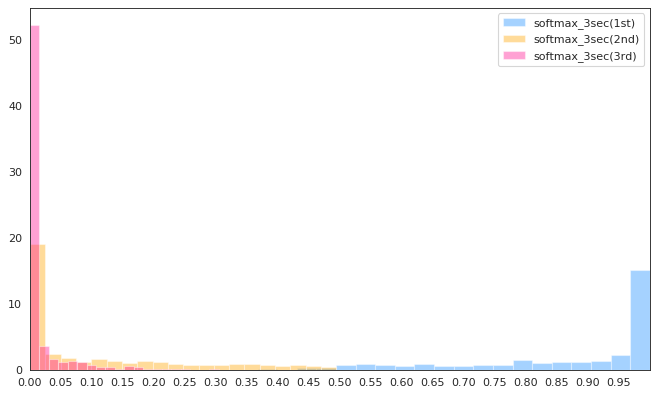

In [66]:
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':0})

plt.figure(figsize=(10,6), dpi= 80)
sns.distplot(y_pred_3sec.max(axis=1), bins=20, color="dodgerblue", label="softmax_3sec(1st)", **kwargs)
sns.distplot(y_pred_3sec_secondmax.max(axis=1), bins=20, color="orange", label="softmax_3sec(2nd)", **kwargs)
sns.distplot(y_pred_3sec.min(axis=1), bins=20, color="deeppink", label="softmax_3sec(3rd)", **kwargs)
plt.xlim(0,1)
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.legend();

In [67]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_pred_3s, y_test_3s)
matrix = confusion_matrix(y_pred_3s[y_pred_3sec.max(axis=1) > 0.90], y_test_3s[y_pred_3sec.max(axis=1) > 0.90])
matrix, len(y_test_3s), len(y_test_3s[y_pred_3sec.max(axis=1) > 0.90])

(array([[248,  20,   1],
        [ 16, 255,   6],
        [  2,  10, 457]]), 1692, 1015)

In [165]:
from sklearn.metrics import classification_report

report = classification_report(y_pred_3s, y_test_3s)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       595
           1       0.74      0.77      0.76       548
           2       0.88      0.91      0.90       549

    accuracy                           0.81      1692
   macro avg       0.81      0.82      0.81      1692
weighted avg       0.81      0.81      0.81      1692



In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [142]:
p = precision_score(y_test_3s, y_pred_3s, average='macro')
r = recall_score(y_test_3s, y_pred_3s, average='macro')
f = f1_score(y_test_3s, y_pred_3s, average='macro')
print('precision: {}'.format(p))
print('recall: {}'.format(r))
print('f1: {}'.format(f))

precision: 0.8150321918617607
recall: 0.8138297872340425
f1: 0.8141359439420084


In [286]:
p_score = dict()
r_score = dict()
f_score = dict()
drop_rate = dict()
theta1 = dict()
theta2 = dict()
theta3 = dict()
tpr = dict()
fpr = dict()

def frange(start, stop=None, step=None):

    if stop == None:
        stop = start + 0.0
        start = 0.0

    if step == None:
        step = 1.0

    while True:
        if step > 0 and start >= stop:
            break
        elif step < 0 and start <= stop:
            break
        yield ("%g" % start) # return float number
        start = start + step

for threshold in frange(0, 1.0, 0.1):
    p = precision_score(y_test_3s[y_pred_3sec.max(axis=1) > float(threshold)], y_pred_3s[y_pred_3sec.max(axis=1) > float(threshold)], average='macro')
    r = recall_score(y_test_3s[y_pred_3sec.max(axis=1) > float(threshold)], y_pred_3s[y_pred_3sec.max(axis=1) > float(threshold)], average='macro')
    f = f1_score(y_test_3s[y_pred_3sec.max(axis=1) > float(threshold)], y_pred_3s[y_pred_3sec.max(axis=1) > float(threshold)], average='macro')
    d = (len(y_test_3s) - len(y_test_3s[y_pred_3sec.max(axis=1) > float(threshold)])) / len(y_test_3s)
    p_score.update({threshold : p})
    r_score.update({threshold : r})
    f_score.update({threshold : f})
    drop_rate.update({threshold : d})
    
    cnf_matrix = confusion_matrix(y_test_3s[y_pred_3sec.max(axis=1) > float(threshold)], y_pred_3s[y_pred_3sec.max(axis=1) > float(threshold)])
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print(TPR, FPR)
    theta1.update({threshold : (np.average(ACC)) / (np.exp(d) + np.average(FPR))})
    theta2.update({threshold : f / (d + np.average(np.exp(FPR)))})
    theta3.update({threshold : np.average(TPR) / (np.exp(d + np.average(FPR)))})
    tpr.update({threshold: np.average(TPR)})
    fpr.update({threshold: np.average(FPR)})


[0.81205674 0.74468085 0.88475177] [0.1214539  0.11347518 0.04432624]
[0.81205674 0.74468085 0.88475177] [0.1214539  0.11347518 0.04432624]
[0.81205674 0.74468085 0.88475177] [0.1214539  0.11347518 0.04432624]
[0.81205674 0.74468085 0.88475177] [0.1214539  0.11347518 0.04432624]
[0.81349911 0.74285714 0.886121  ] [0.12121212 0.11288889 0.0445236 ]
[0.82032668 0.74678899 0.89473684] [0.11861314 0.10889292 0.04105839]
[0.87318087 0.78732106 0.91871456] [0.09724951 0.07623762 0.03298969]
[0.89176471 0.80269058 0.94117647] [0.08158996 0.0631016  0.03099885]
[0.91737892 0.83333333 0.95757576] [0.05882353 0.04846336 0.02766252]
[0.93233083 0.89473684 0.98491379] [0.02803738 0.03013699 0.02177858]
[] []


In [215]:
theta1, theta2, theta3

({'0': inf,
  '0.01': inf,
  '0.02': inf,
  '0.03': inf,
  '0.04': inf,
  '0.05': inf,
  '0.06': inf,
  '0.07': inf,
  '0.08': inf,
  '0.09': inf,
  '0.1': inf,
  '0.11': inf,
  '0.12': inf,
  '0.13': inf,
  '0.14': inf,
  '0.15': inf,
  '0.16': inf,
  '0.17': inf,
  '0.18': inf,
  '0.19': inf,
  '0.2': inf,
  '0.21': inf,
  '0.22': inf,
  '0.23': inf,
  '0.24': inf,
  '0.25': inf,
  '0.26': inf,
  '0.27': inf,
  '0.28': inf,
  '0.29': inf,
  '0.3': inf,
  '0.31': inf,
  '0.32': inf,
  '0.33': inf,
  '0.34': inf,
  '0.35': inf,
  '0.36': inf,
  '0.37': 1253.565714816111,
  '0.38': 626.6349770602066,
  '0.39': 313.51825840391894,
  '0.4': 179.2347582912655,
  '0.41': 156.96346793261642,
  '0.42': 139.50159213288714,
  '0.43': 139.50159213288714,
  '0.44': 89.69072121049206,
  '0.45': 73.97009150956433,
  '0.46': 54.89366726502337,
  '0.47': 42.19803420052243,
  '0.48': 36.25114938906228,
  '0.49': 32.54229203964567,
  '0.5': 28.19639108015333,
  '0.51': 22.031860949398542,
  '0.52': 16.

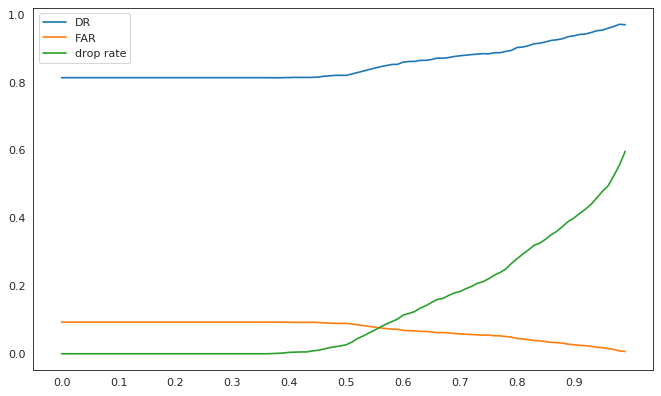

In [245]:
tpr_list = tpr.items() # sorted by key, return a list of tuples

x, y = zip(*tpr_list) # unpack a list of pairs into two tuples
x = list(x)
for i in range(0, len(x)): 
    x[i] = float(x[i])

plt.figure(figsize=(10,6), dpi= 80)
plt.plot(x, y, label='DR')

fpr_list = fpr.items() # sorted by key, return a list of tuples

x2, y2 = zip(*fpr_list) # unpack a list of pairs into two tuples
# plt.figure(figsize=(10,6), dpi= 80)
plt.plot(x, y2, label='FAR')
# plt.show()

drop_list = drop_rate.items() # sorted by key, return a list of tuples

x3, y3 = zip(*drop_list) # unpack a list of pairs into two tuples
# plt.figure(figsize=(30, 15), dpi= 80)
plt.plot(x, y3, label='drop rate')
plt.legend(loc='upper left')
plt.xticks(np.arange(min(x), max(x), 0.1))
plt.show()

In [273]:
# theta1_list = theta1.items() # sorted by key, return a list of tuples

# x, y = zip(*theta1_list) # unpack a list of pairs into two tuples
# plt.figure(figsize=(30,15), dpi= 80)
# plt.plot(x, y)

# theta2_list = theta2.items() # sorted by key, return a list of tuples

# x2, y2 = zip(*theta2_list) # unpack a list of pairs into two tuples
# # plt.figure(figsize=(10,6), dpi= 80)
# plt.plot(x2, y2)
# # plt.show()

# # theta3_list = theta3.items() # sorted by key, return a list of tuples

# # x3, y3 = zip(*theta3_list) # unpack a list of pairs into two tuples
# # # plt.figure(figsize=(30, 15), dpi= 80)
# # plt.plot(x3, y3)
# plt.show()

In [288]:
theta1

{'0': 0.8012976480129764,
 '0.1': 0.8012976480129764,
 '0.2': 0.8012976480129764,
 '0.3': 0.8012976480129764,
 '0.4': 0.798674383865318,
 '0.5': 0.7887249787211998,
 '0.6': 0.7628230308525296,
 '0.7': 0.730616906291621,
 '0.8': 0.6860314844597,
 '0.9': 0.6346912823913266,
 '1': nan}

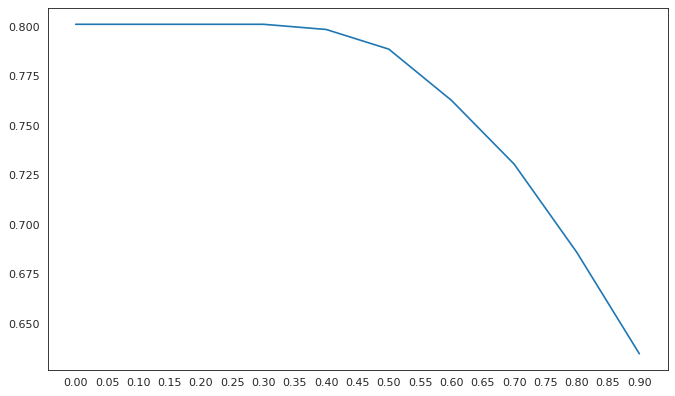

In [287]:
theta1_list = theta1.items()

x, y = zip(*theta1_list) # unpack a list of pairs into two tuples
x = list(x)
for i in range(0, len(x)): 
    x[i] = float(x[i])
plt.figure(figsize=(10,6), dpi= 80)
plt.xticks(np.arange(min(x), max(x), 0.05))
plt.plot(x, y)


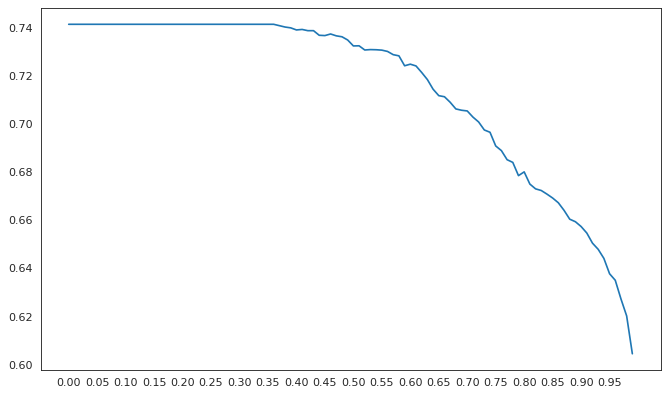

In [266]:
theta2_list = theta2.items()

x, y = zip(*theta2_list) # unpack a list of pairs into two tuples
x = list(x)
for i in range(0, len(x)): 
    x[i] = float(x[i])
plt.figure(figsize=(10,6), dpi= 80)
plt.xticks(np.arange(min(x), max(x), 0.05))
plt.plot(x, y)

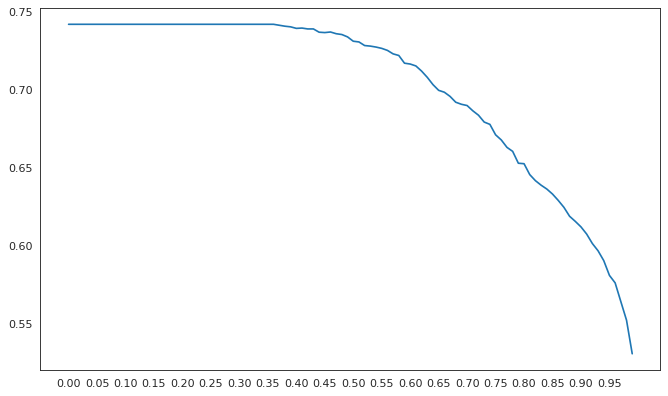

In [267]:
theta3_list = theta3.items()

x, y = zip(*theta3_list) # unpack a list of pairs into two tuples
x = list(x)
for i in range(0, len(x)): 
    x[i] = float(x[i])
plt.figure(figsize=(10,6), dpi= 80)
plt.xticks(np.arange(min(x), max(x), 0.05))
plt.plot(x, y)

In [160]:
p_score

{'0': 0.8150321918617607,
 '0.01': 0.8150321918617607,
 '0.02': 0.8150321918617607,
 '0.03': 0.8150321918617607,
 '0.04': 0.8150321918617607,
 '0.05': 0.8150321918617607,
 '0.06': 0.8150321918617607,
 '0.07': 0.8150321918617607,
 '0.08': 0.8150321918617607,
 '0.09': 0.8150321918617607,
 '0.1': 0.8150321918617607,
 '0.11': 0.8150321918617607,
 '0.12': 0.8150321918617607,
 '0.13': 0.8150321918617607,
 '0.14': 0.8150321918617607,
 '0.15': 0.8150321918617607,
 '0.16': 0.8150321918617607,
 '0.17': 0.8150321918617607,
 '0.18': 0.8150321918617607,
 '0.19': 0.8150321918617607,
 '0.2': 0.8150321918617607,
 '0.21': 0.8150321918617607,
 '0.22': 0.8150321918617607,
 '0.23': 0.8150321918617607,
 '0.24': 0.8150321918617607,
 '0.25': 0.8150321918617607,
 '0.26': 0.8150321918617607,
 '0.27': 0.8150321918617607,
 '0.28': 0.8150321918617607,
 '0.29': 0.8150321918617607,
 '0.3': 0.8150321918617607,
 '0.31': 0.8150321918617607,
 '0.32': 0.8150321918617607,
 '0.33': 0.8150321918617607,
 '0.34': 0.815032191

In [161]:
r_score

{'0': 0.8138297872340425,
 '0.01': 0.8138297872340425,
 '0.02': 0.8138297872340425,
 '0.03': 0.8138297872340425,
 '0.04': 0.8138297872340425,
 '0.05': 0.8138297872340425,
 '0.06': 0.8138297872340425,
 '0.07': 0.8138297872340425,
 '0.08': 0.8138297872340425,
 '0.09': 0.8138297872340425,
 '0.1': 0.8138297872340425,
 '0.11': 0.8138297872340425,
 '0.12': 0.8138297872340425,
 '0.13': 0.8138297872340425,
 '0.14': 0.8138297872340425,
 '0.15': 0.8138297872340425,
 '0.16': 0.8138297872340425,
 '0.17': 0.8138297872340425,
 '0.18': 0.8138297872340425,
 '0.19': 0.8138297872340425,
 '0.2': 0.8138297872340425,
 '0.21': 0.8138297872340425,
 '0.22': 0.8138297872340425,
 '0.23': 0.8138297872340425,
 '0.24': 0.8138297872340425,
 '0.25': 0.8138297872340425,
 '0.26': 0.8138297872340425,
 '0.27': 0.8138297872340425,
 '0.28': 0.8138297872340425,
 '0.29': 0.8138297872340425,
 '0.3': 0.8138297872340425,
 '0.31': 0.8138297872340425,
 '0.32': 0.8138297872340425,
 '0.33': 0.8138297872340425,
 '0.34': 0.813829787

In [191]:
f_score

{'0': 0.8141359439420084,
 '0.01': 0.8141359439420084,
 '0.02': 0.8141359439420084,
 '0.03': 0.8141359439420084,
 '0.04': 0.8141359439420084,
 '0.05': 0.8141359439420084,
 '0.06': 0.8141359439420084,
 '0.07': 0.8141359439420084,
 '0.08': 0.8141359439420084,
 '0.09': 0.8141359439420084,
 '0.1': 0.8141359439420084,
 '0.11': 0.8141359439420084,
 '0.12': 0.8141359439420084,
 '0.13': 0.8141359439420084,
 '0.14': 0.8141359439420084,
 '0.15': 0.8141359439420084,
 '0.16': 0.8141359439420084,
 '0.17': 0.8141359439420084,
 '0.18': 0.8141359439420084,
 '0.19': 0.8141359439420084,
 '0.2': 0.8141359439420084,
 '0.21': 0.8141359439420084,
 '0.22': 0.8141359439420084,
 '0.23': 0.8141359439420084,
 '0.24': 0.8141359439420084,
 '0.25': 0.8141359439420084,
 '0.26': 0.8141359439420084,
 '0.27': 0.8141359439420084,
 '0.28': 0.8141359439420084,
 '0.29': 0.8141359439420084,
 '0.3': 0.8141359439420084,
 '0.31': 0.8141359439420084,
 '0.32': 0.8141359439420084,
 '0.33': 0.8141359439420084,
 '0.34': 0.814135943

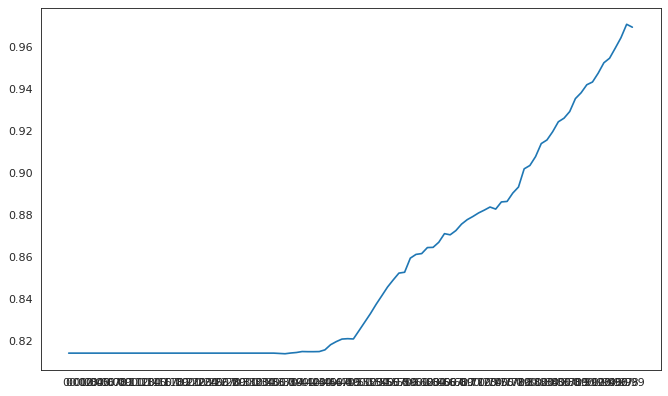

In [179]:
f_list = f_score.items() # sorted by key, return a list of tuples

x, y = zip(*f_list) # unpack a list of pairs into two tuples
plt.figure(figsize=(10,6), dpi= 80)
plt.plot(x, y)
plt.show()

In [163]:
drop_rate

{'0': 0.0,
 '0.01': 0.0,
 '0.02': 0.0,
 '0.03': 0.0,
 '0.04': 0.0,
 '0.05': 0.0,
 '0.06': 0.0,
 '0.07': 0.0,
 '0.08': 0.0,
 '0.09': 0.0,
 '0.1': 0.0,
 '0.11': 0.0,
 '0.12': 0.0,
 '0.13': 0.0,
 '0.14': 0.0,
 '0.15': 0.0,
 '0.16': 0.0,
 '0.17': 0.0,
 '0.18': 0.0,
 '0.19': 0.0,
 '0.2': 0.0,
 '0.21': 0.0,
 '0.22': 0.0,
 '0.23': 0.0,
 '0.24': 0.0,
 '0.25': 0.0,
 '0.26': 0.0,
 '0.27': 0.0,
 '0.28': 0.0,
 '0.29': 0.0,
 '0.3': 0.0,
 '0.31': 0.0,
 '0.32': 0.0,
 '0.33': 0.0,
 '0.34': 0.0,
 '0.35': 0.0,
 '0.36': 0.0,
 '0.37': 0.000591016548463357,
 '0.38': 0.001182033096926714,
 '0.39': 0.002364066193853428,
 '0.4': 0.004137115839243499,
 '0.41': 0.004728132387706856,
 '0.42': 0.005319148936170213,
 '0.43': 0.005319148936170213,
 '0.44': 0.008274231678486997,
 '0.45': 0.01004728132387707,
 '0.46': 0.013593380614657211,
 '0.47': 0.01773049645390071,
 '0.48': 0.020685579196217493,
 '0.49': 0.02304964539007092,
 '0.5': 0.026595744680851064,
 '0.51': 0.034278959810874705,
 '0.52': 0.04491725768321513

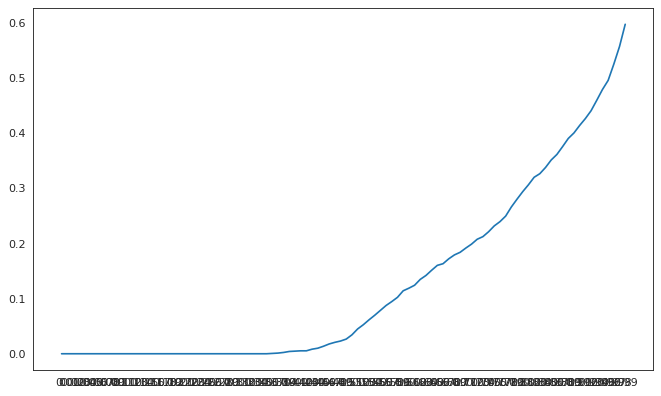

In [174]:
lists = drop_rate.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(10,6), dpi= 80)
plt.plot(x, y)
plt.show()

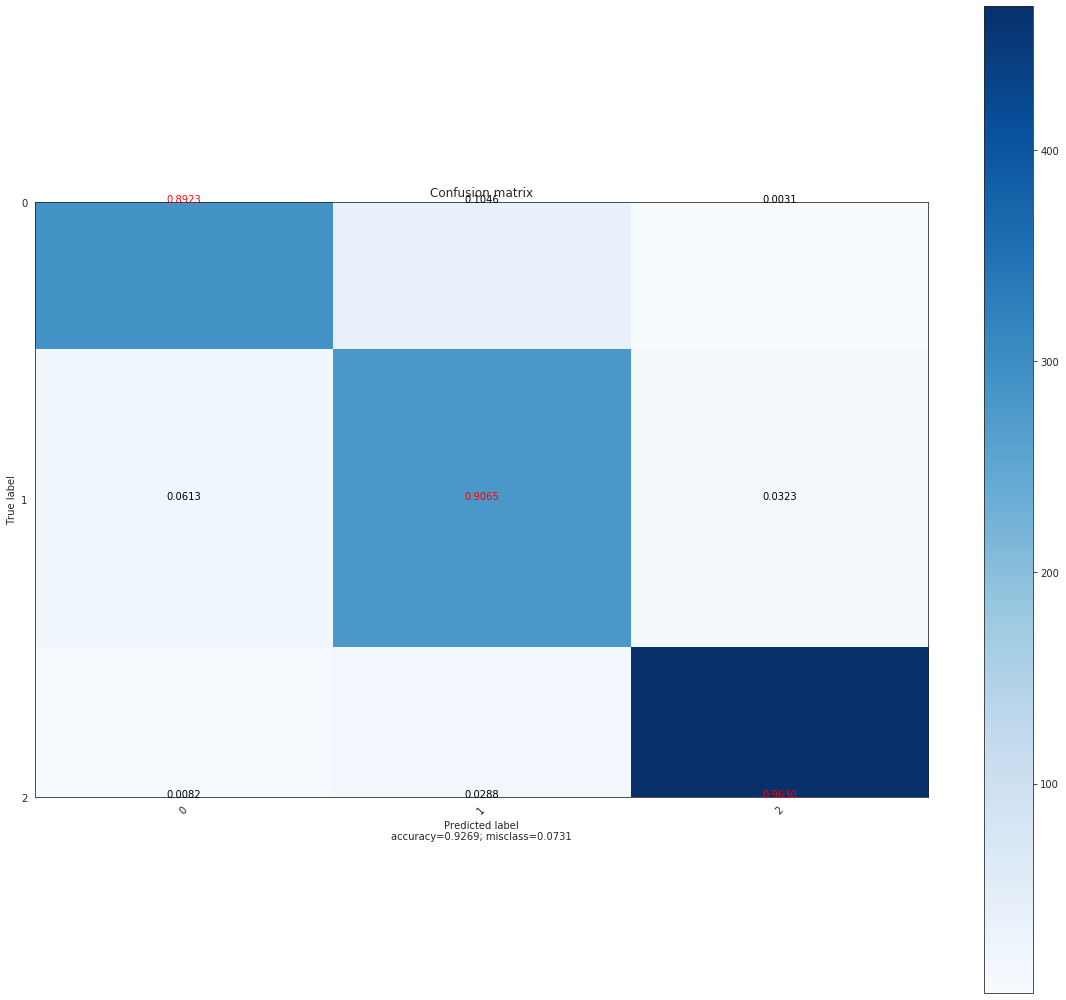

In [254]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage|
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 14))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
plot_confusion_matrix(matrix, [0, 1, 2])

In [255]:
len(y_pred_TopToTwo), len(y_pred_MiddleToTwo), len(y_pred_ButtomToTwo)

(595, 548, 549)

In [23]:
len(y_pred_TopToTwo) + len(y_pred_MiddleToTwo) + len(y_pred_ButtomToTwo)

1692

In [24]:
len(y_pred_3sec), len(y_test)

(1692, 1692)

In [25]:
y_pred_TopTopToThree.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [26]:
len(y_pred_TopTopToThree.argmax(axis=1))

71

In [27]:
y_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 0].argmax(axis=1)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6, 11, 14, 14, 14,
       14, 14, 14])

In [28]:
len(y_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 0])

71

In [29]:
y_pred_TopButtomToThree.argmax(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
len(y_pred_TopButtomToThree.argmax(axis=1))

549

In [31]:
y_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 1].argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [32]:
len(y_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 1].argmax(axis=1))

549

In [33]:
y_pred_TBTT = y_pred_TopButtomToThree.argmax(axis=1)
y_pred_TBTT

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
y_pred_TBTT[y_pred_TBTT == 0] = 3
y_pred_TBTT[y_pred_TBTT == 1] = 4
y_pred_TBTT[y_pred_TBTT == 2] = 5

In [35]:
y_pred_TBTT

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 5, 5, 5, 5, 3, 5, 3, 3, 5, 3, 5, 5, 5, 5, 3, 5, 3, 5, 5,
       5, 3, 3, 5, 5, 3, 3, 5, 3, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5,
       4, 5, 3, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [36]:
y_pred_MiddleTopToThree.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1])

In [37]:
len(y_pred_MiddleTopToThree.argmax(axis=1))

213

In [38]:
y_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 0].argmax(axis=1)

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 14, 14, 14, 14, 14, 14, 17, 17])

In [39]:
len(y_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 0].argmax(axis=1))

213

In [40]:
y_pred_MTTT = y_pred_MiddleTopToThree.argmax(axis=1)
y_pred_MTTT

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1])

In [41]:
y_pred_MTTT[y_pred_MTTT == 0] = 6
y_pred_MTTT[y_pred_MTTT == 1] = 7
y_pred_MTTT[y_pred_MTTT == 2] = 8
y_pred_MTTT

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8,
       8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 6, 6, 6, 6, 7, 7])

In [42]:
y_pred_MiddleButtomToThree.argmax(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [43]:
len(y_pred_MiddleButtomToThree.argmax(axis=1))

368

In [44]:
y_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 1].argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10

In [45]:
len(y_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 1].argmax(axis=1))

368

In [46]:
y_pred_MBTT = y_pred_MiddleButtomToThree.argmax(axis=1)
y_pred_MBTT

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [47]:
y_pred_MBTT[y_pred_MBTT == 0] = 9
y_pred_MBTT[y_pred_MBTT == 1] = 10
y_pred_MBTT[y_pred_MBTT == 2] = 11
y_pred_MBTT

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9, 11, 10, 11, 11,
       10,  9, 11,  9, 10, 10, 10, 10, 11, 11,  9, 11, 11, 11, 11,  9, 10,
       10, 10, 11, 11, 11,  9, 11, 10, 10,  9,  9,  9, 10, 10, 10,  9,  9,
       10, 10, 10, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,
       10, 10,  9, 10,  9, 10,  9, 10,  9, 10, 10, 10,  9, 10, 10, 10, 10,
       10, 10,  9, 10, 10,  9,  9, 10,  9, 10, 10,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10,  9, 10, 10, 10,  9,  9,  9, 10,  9, 10,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,  9, 10,  9,
       10,  9, 10,  9,  9,  9, 10,  9,  9,  9,  9,  9,  9,  9, 11, 11,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,  9,  9,  9,
        9,  9, 10,  9, 10

In [48]:
y_pred_ButtomTopToThree.argmax(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0])

In [49]:
len(y_pred_ButtomTopToThree.argmax(axis=1))

210

In [50]:
y_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 0].argmax(axis=1)

array([ 1,  1,  1,  1,  3,  5,  5,  5,  5,  5,  5,  6,  7,  7,  9, 10, 10,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17,
       17, 17, 17, 17, 17, 17])

In [51]:
len(y_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 0].argmax(axis=1))

210

In [52]:
y_pred_BTTT = y_pred_ButtomTopToThree.argmax(axis=1)
y_pred_BTTT

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0])

In [53]:
y_pred_BTTT[y_pred_BTTT == 0] = 12
y_pred_BTTT[y_pred_BTTT == 1] = 13
y_pred_BTTT[y_pred_BTTT == 2] = 14
y_pred_BTTT

array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 12, 14, 14, 14,
       14, 14, 14, 14, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 13, 12,
       13, 13, 13, 13, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 12,
       12, 13, 13, 13, 13, 12])

In [54]:
y_pred_ButtomButtomToThree.argmax(axis=1)

array([2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
len(y_pred_ButtomButtomToThree.argmax(axis=1))

281

In [56]:
y_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 1].argmax(axis=1)

array([13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17

In [57]:
len(y_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 1].argmax(axis=1))

281

In [58]:
y_pred_BBTT = y_pred_ButtomButtomToThree.argmax(axis=1)
y_pred_BBTT

array([2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
y_pred_BBTT[y_pred_BBTT == 0] = 15
y_pred_BBTT[y_pred_BBTT == 1] = 16
y_pred_BBTT[y_pred_BBTT == 2] = 17
y_pred_BBTT

array([17, 15, 17, 17, 17, 15, 17, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17

In [61]:
y_pred = np.concatenate((y_pred_TopTopToThree.argmax(axis=1), y_pred_TBTT, y_pred_MTTT, y_pred_MBTT, y_pred_BTTT, y_pred_BBTT), axis=0)

In [62]:
y_pred, len(y_pred)

(array([ 1,  1,  1, ..., 17, 17, 17]), 1692)

In [63]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test.argmax(axis=1))
# matrix = confusion_matrix(y_test[y_pred.max(axis=1) > 0.7].argmax(axis=1), y_pred[y_pred.max(axis=1) > 0.7].argmax(axis=1))
matrix

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [51,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1, 14,  9, 48,  5, 16, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  4, 25, 41, 22,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [22, 80, 81, 21, 48, 56, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 30, 29,  7,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 64, 41,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  1, 33,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 55, 32, 21,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42, 37, 61, 25,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

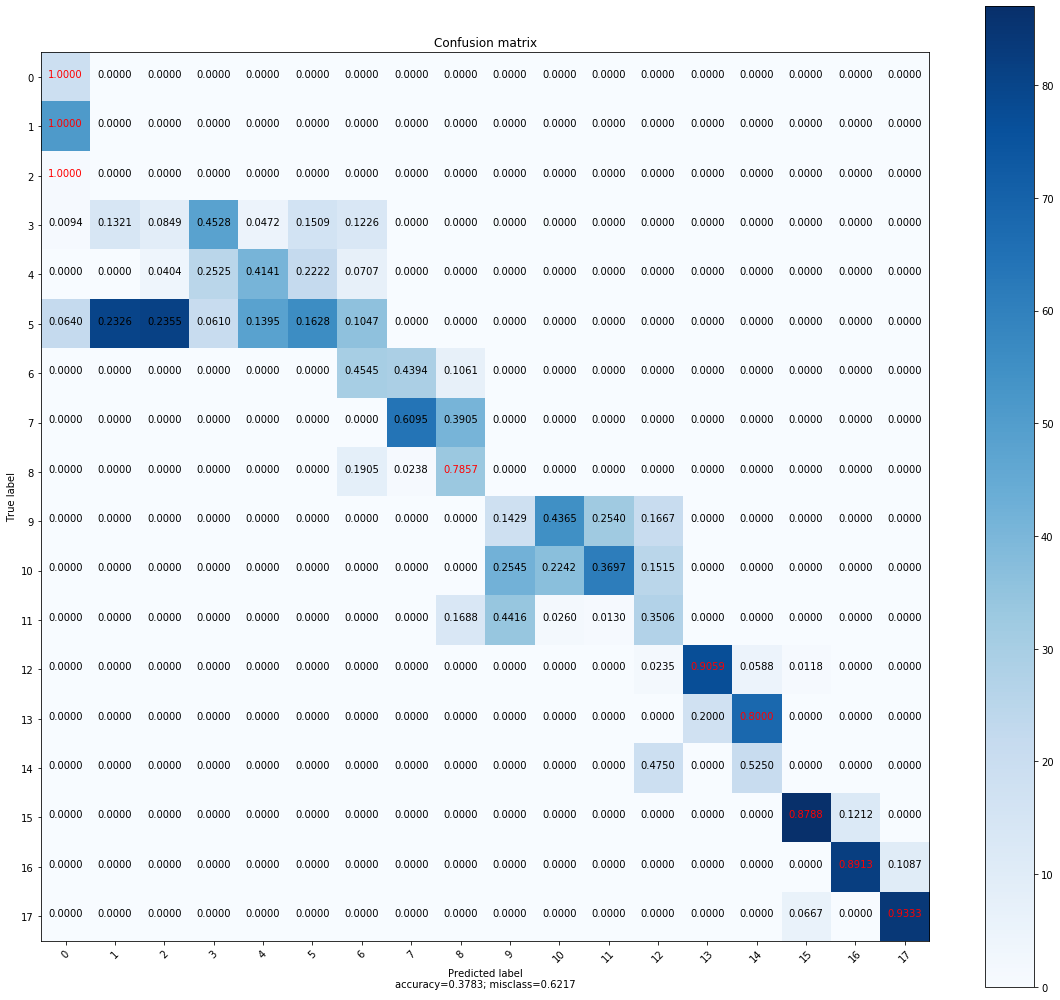

In [64]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage|
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 14))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [26]:
X_test[0].shape

(144, 1)

In [24]:
one_test = np.reshape(X_test[0], (1, X_test[0].shape[0], X_test[0].shape[1]))
one_test.shape

(1, 144, 1)

In [27]:
one_test

array([[[-0.99063015],
        [-0.89059682],
        [-0.70649538],
        [-0.87725951],
        [-0.76233795],
        [-0.89350874],
        [-0.76272074],
        [-0.78733247],
        [-0.83600327],
        [-0.7779857 ],
        [-0.74402156],
        [-1.02369236],
        [-1.14812201],
        [-1.16277141],
        [-1.15074772],
        [-0.92205267],
        [-0.91593185],
        [-0.8610631 ],
        [-0.95833558],
        [-1.11209724],
        [-0.83975244],
        [-1.01136548],
        [-1.03390043],
        [-0.93042182],
        [-0.95902365],
        [-1.02660282],
        [-0.84842312],
        [-0.97348321],
        [-0.90468305],
        [-1.00794762],
        [-1.0666574 ],
        [-1.04514777],
        [-0.84641719],
        [-0.86705859],
        [-1.06837128],
        [-1.15196067],
        [-1.05990771],
        [-0.91861774],
        [-0.92560881],
        [-0.99787076],
        [-0.91557598],
        [-1.0369491 ],
        [-1.05320889],
        [-0

In [22]:
X_test.shape

(1692, 144, 1)

In [51]:
y_pred_3sec = model_3sec.predict(one_test)
y_pred_TopToTwo = model_TopToTwo.predict(one_test[y_pred_3sec.argmax(axis=1) == 0])
y_pred_MiddleToTwo = model_MiddleToTwo.predict(one_test[y_pred_3sec.argmax(axis=1) == 1])
y_pred_ButtomToTwo = model_ButtomToTwo.predict(one_test[y_pred_3sec.argmax(axis=1) == 2])

if y_pred_TopToTwo != []:
    y_pred_TopTopToThree = model_TopTopToThree.predict(one_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 0])
    y_pred_TopButtomToThree = model_TopButtomToThree.predict(one_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_TopToTwo.argmax(axis=1) == 1])
    if y_pred_TopTopToThree != []:
        print(y_pred_TopTopToThree.argmax(axis=1))
    else:
        print(y_pred_TopButtomToThree.argmax(axis=1))
if y_pred_MiddleToTwo != []:
    y_pred_MiddleTopToThree = model_MiddleTopToThree.predict(one_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 0])
    y_pred_MiddleButtomToThree = model_MiddleButtomToThree.predict(one_test[y_pred_3sec.argmax(axis=1) == 1][y_pred_MiddleToTwo.argmax(axis=1) == 1])
    if y_pred_MiddleTopToThree != []:
        print(y_pred_MiddleTopToThree.argmax(axis=1))
    else:
        print(y_pred_MiddleButtomToThree.argmax(axis=1))    
if y_pred_ButtomToTwo != []:    
    y_pred_ButtomTopToThree = model_ButtomTopToThree.predict(one_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 0])
    y_pred_ButtomButtomToThree = model_ButtomButtomToThree.predict(one_test[y_pred_3sec.argmax(axis=1) == 2][y_pred_ButtomToTwo.argmax(axis=1) == 1])
    if y_pred_ButtomTopToThree != []:
        print(y_pred_ButtomTopToThree)
    else:
        print(y_pred_ButtomButtomToThree)    

[2]


/home/wuh007/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [46]:
y_pred_TopToTwo, y_pred_MiddleToTwo, y_pred_ButtomToTwo

(array([[9.6238034e-07, 9.9999905e-01]], dtype=float32), [], [])

In [41]:
y_pred_TopToTwo

array([[9.6238034e-07, 9.9999905e-01]], dtype=float32)

In [32]:
y_pred_3sec.argmax(axis=1) == 0

array([ True])

In [37]:
X_test[y_pred_3sec.argmax(axis=1) == 0][y_pred_MiddleToTwo.argmax(axis=1) == 0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1692 but corresponding boolean dimension is 1